<center><h1> COVID-19 Global Impact Analysis </h1></center>

<center><img src="https://innovativegenomics.org/wp-content/uploads/2020/04/red-and-sky-blue-single-virion.png" width="400" height="400"></center>

In [1]:
# Import necessary libraries that will be used in the analysis
from datetime import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read transformed CSV
df = pd.read_csv('raw_data.csv')

### Reading the Dataset
The data set contains the following information that is gathered from at least 210 countries that has been impacted by COVID-19.
* Code
* Country
* Date
* HDI : Human Development Index
* TC : Total Cases
* TD : Total Deaths
* STI : Stringency Index
* POP : Population
* GDPCAP : GDP Per Capita

### Data Exploration (EDA - Exploratory Data Analysis)

In [3]:
# Dataframe Overview
df

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.00,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,8055.0,231.0,76.85,14862927,1899.775,0.535,8.994048296,5.442417711,4.34185547,16.514381,7.549490737
50414,ZWE,Zimbabwe,2020-10-16,8075.0,231.0,76.85,14862927,1899.775,0.535,8.996528148,5.442417711,4.34185547,16.514381,7.549490737
50415,ZWE,Zimbabwe,2020-10-17,8099.0,231.0,76.85,14862927,1899.775,0.535,8.999495876,5.442417711,4.34185547,16.514381,7.549490737
50416,ZWE,Zimbabwe,2020-10-18,8110.0,231.0,76.85,14862927,1899.775,0.535,9.000853147,5.442417711,4.34185547,16.514381,7.549490737


In [4]:
# Check shape
df.shape

(50418, 14)

In [5]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   iso_code                 50418 non-null  object 
 1   location                 50418 non-null  object 
 2   date                     50418 non-null  object 
 3   total_cases              47324 non-null  float64
 4   total_deaths             39228 non-null  float64
 5   stringency_index         43292 non-null  float64
 6   population               50418 non-null  int64  
 7   gdp_per_capita           44706 non-null  float64
 8   human_development_index  44216 non-null  float64
 9   Unnamed: 9               50418 non-null  object 
 10  Unnamed: 10              50418 non-null  object 
 11  Unnamed: 11              50418 non-null  object 
 12  Unnamed: 12              50418 non-null  float64
 13  Unnamed: 13              50418 non-null  object 
dtypes: float64(6), int64(1

In [6]:
# Check for missing values
df.isna().sum()

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64

In [7]:
# Overview of metrics for quick insight
df.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 12
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000,50418.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139,15.442097
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902,2.495039
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000,6.695799
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000,14.151619
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000,15.929201
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000,17.187513
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000,21.087439


In [8]:
# Country Count
country_count = len(df['location'].unique())
country_names = df['location'].unique()
print(f"A total of {country_count} countries are included in this analysis.\n")
print('COUNTRY\n------------\n'+'\n'.join(country_names))

A total of 210 countries are included in this analysis.

COUNTRY
------------
Afghanistan
Albania
Algeria
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Faeroe Islands
Falkland Islands
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Ira

### Correlation of Data

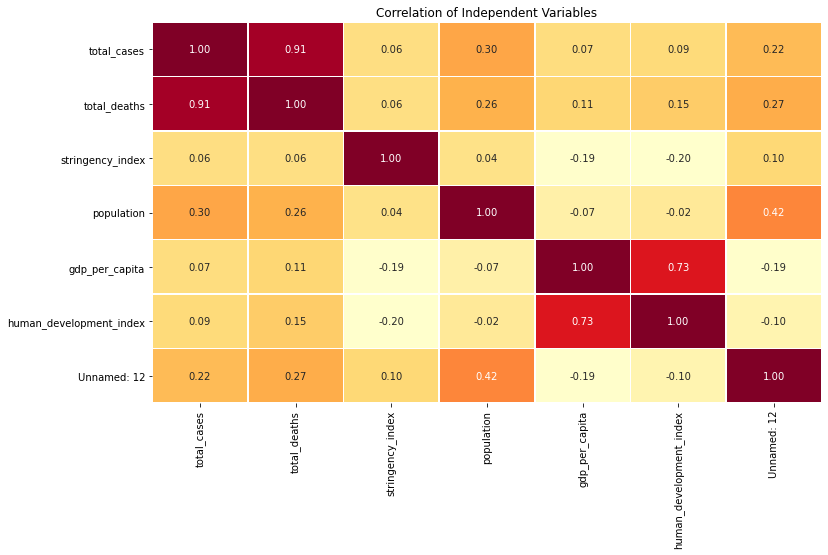

In [9]:
# Finding Correlation
corr_matrix = df.corr()
# Visualize correlation
fig, ax = plt.subplots(figsize=(12, 7))

# Use seaborn to visualize
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlOrRd",
                cbar=False)

# Customize
ax.set(title="Correlation of Independent Variables");

Correlation Matrix: A higher positive value means a potential positive correlation, a higher negative value means a potential negative correlation.

We can see that `total cases` and `total deaths` are highly corellated to each other along with `hdi` aand `gdp per capita`.

## Understanding Human Development Index (HDI)
The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.


Source: <a href="http://hdr.undp.org/en/content/human-development-index-hdi">Human Development Reports</a>

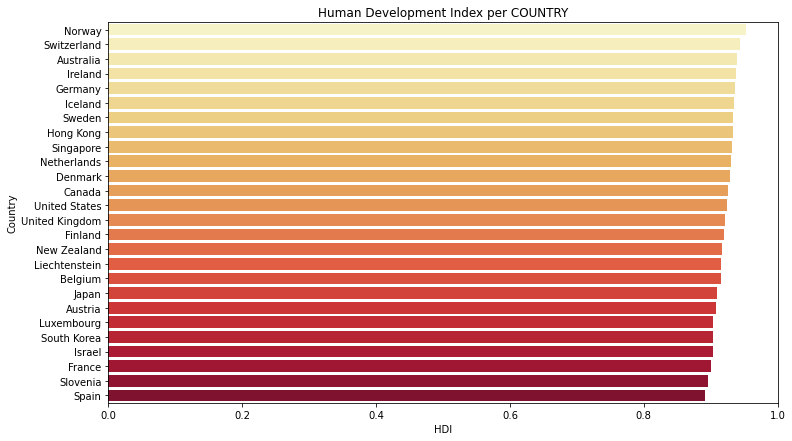

In [10]:
# Sort values 
df_sort = df.sort_values(by='human_development_index', ascending=False)[:7000]

# Use Object Oriented method
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data
sns.barplot(x=df_sort['human_development_index'],
                    y=df_sort['location'],
                     palette="YlOrRd")

# Customize Plot
ax.set(title="Human Development Index per COUNTRY",
      xlabel="HDI",
      ylabel="Country");

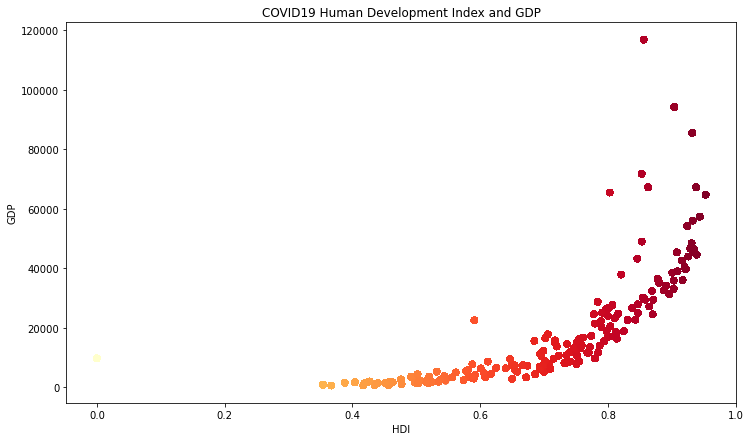

In [11]:
# HDI and GDP during COVID19
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data
scatter = ax.scatter(x=df['human_development_index'],
                    y=df['gdp_per_capita'],
                     c=df['human_development_index'],
                     cmap="YlOrRd")

# Customize Plot
ax.set(title="COVID19 Human Development Index and GDP",
      xlabel="HDI",
      ylabel="GDP");

## COVID Cases
COVID-19 affects different people in different ways. Infected people have had a wide range of symptoms reported – from mild symptoms to severe illness.

In [12]:
# Calculate mean of total cases with the 210 participants
mean_case = np.mean(df['total_cases'])
print(f"The mean value of total cases with the 210 participants is {mean_case:.2f}")

The mean value of total cases with the 210 participants is 66219.27


#### Cases overtime

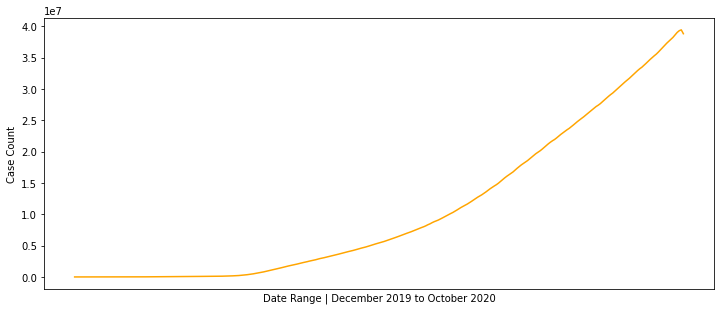

In [13]:
# Sum Total Case per day
total_sum_month = df.groupby(["date"], as_index=False).sum()

# Create figure
plt.figure(figsize=(12, 5))
plt.plot(total_sum_month['total_cases'], c='orange')
plt.xlabel("Date Range | December 2019 to October 2020")
plt.ylabel("Case Count")
plt.xticks([]);

## COVID Deaths

#### Severe Cases
About 14% of COVID-19 cases are severe, with an infection that affects both lungs. As the swelling gets worse, your lungs fill with fluid and debris.

You might also have more serious pneumonia. The air sacs fill with mucus, fluid, and other cells that are trying to fight the infection. This can make it harder for your body to take in oxygen. You may have trouble breathing or feel short of breath. You may also breathe faster.

If your doctor takes a CT scan of your chest, the opaque spots in your lungs look like they start to connect to each other.

#### Critical Cases
In critical COVID-19 -- about 5% of total cases -- the infection can damage the walls and linings of the air sacs in your lungs. As your body tries to fight it, your lungs become more inflamed and fill with fluid. This can make it harder for them to swap oxygen and carbon dioxide.

You might have severe pneumonia or acute respiratory distress syndrome (ARDS). In the most critical cases, your lungs need help from a machine called a ventilator to do their job.

There’s evidence that 20-30% of the critically ill patients can develop clots in the lungs, heart, brain and legs, some of which are life threatening.

A few people have needed lung transplants because of severe tissue damage from COVID-19.

#### COVID-19 Complications
It can take time to feel better after you have pneumonia. You may feel more tired than usual for a while. You might also find that you can’t exercise like you used to.

Some people had a cough even after they recovered from COVID-19. Others had scarring in their lungs. Doctors are still studying whether these effects are permanent or might heal over time.

Source: https://www.webmd.com/lung/what-does-covid-do-to-your-lungs#2

In [14]:
mean_deaths = np.mean(df['total_deaths'])
print(f"The mean value of total deaths with the 210 participants is {mean_deaths:.2f}")

The mean value of total deaths with the 210 participants is 2978.77


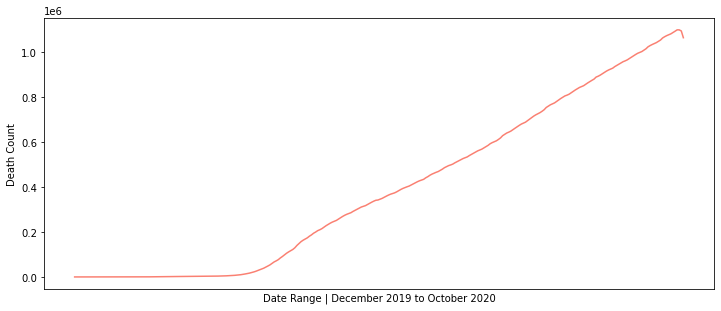

In [15]:
# Total Deaths per Day
# Create figure
plt.figure(figsize=(12, 5))
plt.plot(total_sum_month['total_deaths'], c='salmon')
plt.xlabel("Date Range | December 2019 to October 2020")
plt.ylabel("Death Count")
plt.xticks([]);

#### Total Deaths vs Total Cases

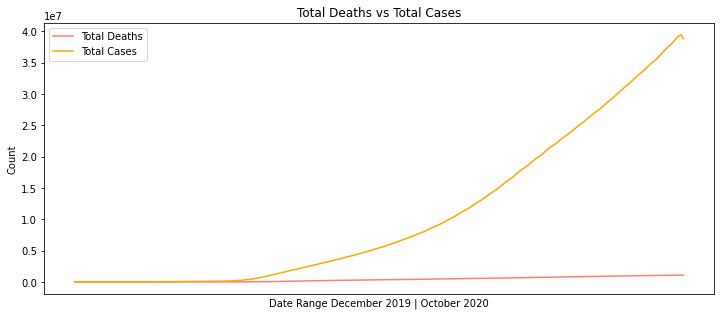

In [16]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 5))

# Total Deaths
sns.lineplot(x=total_sum_month["date"], 
             y=total_sum_month['total_deaths'],
            color='salmon')

# Total Cases
sns.lineplot(x=total_sum_month['date'],
            y=total_sum_month['total_cases'],
            color='orange')

# Customize
plt.title("Total Deaths vs Total Cases")
plt.xlabel("Date Range December 2019 | October 2020")
plt.ylabel("Count")
plt.xticks([])
plt.legend(["Total Deaths", "Total Cases"]);

## Understanding Per Capita
GDP Per capita GDP is a global measure for gauging the prosperity of nations and is used by economists, along with GDP, to analyze the prosperity of a country based on its economic growth.

There are a few ways to analyze a country’s wealth and prosperity. Per capita GDP is the most universal because its components are regularly tracked on a global scale, providing for ease of calculation and usage. Income per capita is another measure for global prosperity analysis, though it is less broadly used.

In [17]:
# TODO